##### Assignment -8 :Ensemble Learning for Complex Regression Modeling on Bike Share Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load data

In [2]:
df=pd.read_csv("/mnt/c/Users/abhim/Desktop/DA lab/hour.csv")

In [3]:
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dropped irrelevant columns like instant, dteday, casual, and registered

In [4]:
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


Convert categorical features  into a numerical format

In [5]:
categorical_cols = ['season', 'weathersit', 'mnth', 'hr','weekday',]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(float)

In [6]:
df.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,hr_20,hr_21,hr_22,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.0,0.0,0.0,0.24,0.2879,0.81,0.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.22,0.2727,0.80,0.0,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.22,0.2727,0.80,0.0,32.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.24,0.2879,0.75,0.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.24,0.2879,0.75,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [8]:
X.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,hr_20,hr_21,hr_22,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.0,0.0,0.0,0.24,0.2879,0.81,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.22,0.2727,0.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.22,0.2727,0.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.24,0.2879,0.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.24,0.2879,0.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
y.head(5)

0    16.0
1    40.0
2    32.0
3    13.0
4     1.0
Name: cnt, dtype: float64

Splitting the preprocessed data into training and testing sets.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Trainning a single Decision Tree Regressor  and a single Linear Regression model .

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


Decision Tree Regressor

In [13]:
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Linear Regression model

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Evaluating both models on the test set using the Root Mean Squared Error (RMSE).

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

In [17]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [18]:
print(f" Decision Tree RMSE: {rmse_dt:.2f}")

 Decision Tree RMSE: 118.46


In [19]:
print(f" Linear Regression RMSE: {rmse_lr:.2f}")

 Linear Regression RMSE: 100.45


 Baseline Model Selection

After training and evaluating both models on the test dataset:

- Decision Tree Regressor (max_depth=6) achieved an **RMSE of 118.46**
- Linear Regression achieved an **RMSE of 100.45**

 Therefore, the **Linear Regression model** performs better (lower RMSE) and will be used as our **baseline performance metric** for further model improvements.


##### Ensemble Techniques for Bias and Variance Reduction

Bagging

 Hypothesis: Bagging primarily targets variance reduction

Bagging, short for bootstrap aggregating, is a technique designed to reduce variance in predictive models.It works by creating multiple subsets of the original training data using random sampling with replacement. Each subset is used to train a separate model, typically of the same type such as a decision tree. Because each model is trained on slightly different data, they make different errors.When the predictions of these models are averaged, random fluctuations or noise tend to cancel out.  This process produces a combined model with more stable and reliable predictions. Bagging does not aim to reduce bias but rather to make high-variance models less overfitted.  It is particularly effective for algorithms like decision trees that are sensitive to training data changes.  Overall, bagging increases robustness and generalization performance on unseen data.  Hence, it primarily serves as a variance reduction technique in ensemble learning.

Implemented a Bagging Regressor using the Decision Tree Regressor

In [20]:
from sklearn.ensemble import BaggingRegressor





In [21]:
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=6, random_state=42),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

In [22]:

bagging_model.fit(X_train, y_train)

,estimator,DecisionTreeR...ndom_state=42)
,n_estimators,50
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [23]:
y_pred_bag = bagging_model.predict(X_test)

Bagging RMSE on the test set

In [24]:
rmse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))

In [25]:
print(f" Bagging Regressor RMSE: {rmse_bag:.2f}")

 Bagging Regressor RMSE: 112.34


##### Variance Reduction through Bagging

We trained a Bagging Regressor using 50 Decision Trees (each with `max_depth=6`) as the base estimators.

-  **Single Decision Tree RMSE:** 118.46  
-  **Bagging Regressor RMSE:** 112.34  

Although the improvement is **moderate**, the **Bagging Regressor achieved a lower RMSE** than the single Decision Tree, indicating that **bagging effectively reduced model variance**.

However, the difference is not very large, which suggests:
- The individual Decision Trees might not have been highly variable to begin with (due to the depth limit of 6).  
- Increasing the number of estimators or allowing slightly deeper trees could potentially enhance variance reduction further.  

 **Conclusion:**  
Bagging did **reduce variance** and slightly improved performance over the single Decision Tree, but the effect was **limited**, possibly due to the bias introduced by shallow trees.


##### Boosting

 Hypothesis: Boosting primarily targets bias reduction

Boosting is an ensemble technique that focuses on reducing bias to improve model accuracy. It works by sequentially training weak learners, where each new model corrects the errors of the previous ones. Initially, all data points are given equal weight, but misclassified samples get higher importance in later rounds.  This allows the model to focus more on difficult examples that were previously predicted incorrectly. By combining many weak learners, boosting gradually builds a strong predictive model.  Unlike bagging, which reduces variance, boosting reduces bias and improves model fit. However, because it learns from errors iteratively, boosting can be more prone to overfitting if not regularized. Common algorithms like AdaBoost, Gradient Boosting, and XGBoost are based on this principle.Overall, boosting enhances accuracy by minimizing systematic errors in the model. Thus, it primarily serves as a bias reduction technique in ensemble learning.


Implementing the Gradient Boosting Regressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
gbr_model = GradientBoostingRegressor(
    n_estimators=100,      
    learning_rate=0.1,    
    max_depth=3,           
    random_state=42
)

In [28]:
gbr_model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [29]:
y_pred_gbr = gbr_model.predict(X_test)

Boosting RMSE on test set

In [30]:
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))


In [31]:
print(f" Gradient Boosting Regressor RMSE: {rmse_gbr:.2f}")

 Gradient Boosting Regressor RMSE: 78.97


 Bias Reduction through Boosting

The Gradient Boosting Regressor achieved an **RMSE of 78.97**, compared to the **Bagging Regressor’s 112.34** and the **Linear Regression baseline’s 100.45**.  
This clearly demonstrates that **boosting outperformed both the single model and the bagging ensemble**.  

While bagging reduces variance by averaging multiple independent models, boosting focuses on **bias reduction** by sequentially improving weak learners.  
Each new tree in boosting corrects the errors of the previous ones, allowing the ensemble to capture complex patterns that simpler models miss.  
This iterative learning process leads to lower bias and significantly improved accuracy on the test set.  

 **Conclusion:**  
The strong performance of the Gradient Boosting Regressor supports the hypothesis that **boosting primarily targets bias reduction**, resulting in a more accurate and well-fitted model compared to both single and bagged models.


##### Stacking for Optimal Performance

##### Principle of Stacking and the Role of the Meta-Learner

**Stacking** (or Stacked Generalization) is an advanced ensemble learning technique that combines multiple diverse models to improve predictive performance.  
Unlike bagging or boosting, which aggregate or sequentially adjust weak learners, stacking uses a **Meta-Learner** to learn the best way to combine predictions from different **Base Learners**.  

The process works in two stages:
1. **Base Learners:** Multiple algorithms (e.g., Decision Tree, Linear Regression, Gradient Boosting) are trained independently on the training data.  
2. **Meta-Learner:** The predictions made by these base learners are then used as input features for a second model — the meta-learner.  

The **Meta-Learner** learns patterns in how each base model performs, determining which models are more reliable in different regions of the feature space.  
By learning to weight and combine predictions optimally, it captures complementary strengths of the base models.  
This results in a final prediction that often outperforms any single model or ensemble based solely on averaging.  

 **In essence, stacking leverages model diversity and the learning ability of a meta-learner to achieve optimal prediction accuracy.**


#####  Level-0 Base Learners Definition

In the stacking ensemble, the **Level-0 models** (or **Base Learners**) are diverse regressors that generate individual predictions.  
These predictions are later combined by a **Meta-Learner** at Level-1 to produce the final output.  
Below are the three chosen Base Learners:

1. **K-Nearest Neighbors Regressor (KNeighborsRegressor)**  
   - A non-parametric algorithm that predicts the target value based on the average of the *k* nearest data points in the feature space.  
   - It captures local patterns effectively but may struggle with high-dimensional data.  

2. **Bagging Regressor**  
   - An ensemble method that trains multiple Decision Tree regressors on different random subsets of the training data.  
   - It reduces **variance** by averaging the predictions of all trees, leading to more stable results than a single model.  

3. **Gradient Boosting Regressor**  
   - A sequential ensemble method that builds trees one after another, with each tree correcting the errors of the previous ones.  
   - It primarily targets **bias reduction**, producing strong predictive performance by combining many weak learners.  

 Together, these diverse models balance **bias** and **variance**, providing a rich foundation for the Meta-Learner to achieve optimal performance.


In [33]:
from sklearn.ensemble import StackingRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

# Define Level-0 Base Learners
base_learners = [
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('bagging', BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=6, random_state=42),
        n_estimators=50,
        random_state=42,
        n_jobs=-1
    )),
    ('gbr', GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
]

# Define Level-1 Meta-Learner (Ridge Regression)
meta_learner = Ridge(alpha=1.0)

# Build Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    n_jobs=-1
)

# Train the Stacking Regressor
stacking_model.fit(X_train, y_train)




,estimators,"[('knn', ...), ('bagging', ...), ...]"
,final_estimator,Ridge()
,cv,None
,n_jobs,-1
,passthrough,False
,verbose,0
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2


 RMSE for the Stacking Regresso

In [35]:
y_pred_stack = stacking_model.predict(X_test)

rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))

print(f" Stacking Regressor RMSE: {rmse_stack:.2f}")

 Stacking Regressor RMSE: 67.04


Comparative Table

 Model Performance Comparison (RMSE on Test Set):


,Model,RMSE
0,Stacking Regressor,67.04
1,Gradient Boosting Regressor,78.97
2,Baseline Model (Linear Regression),100.45
3,Bagging Regressor,112.34


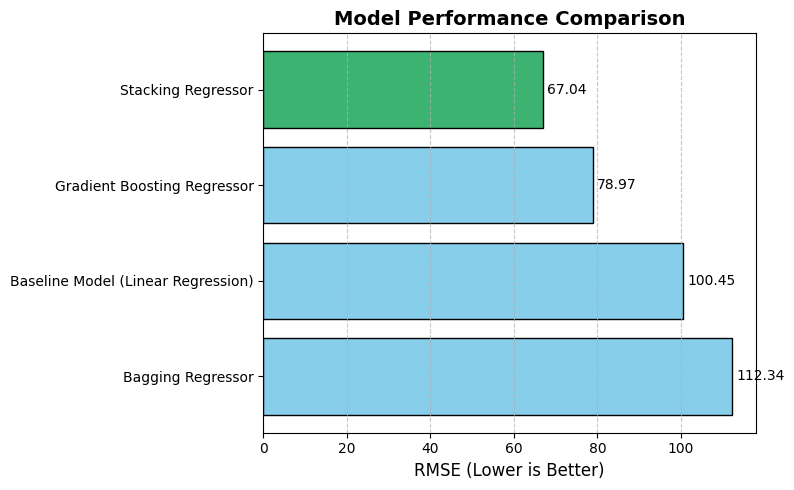

In [37]:
results = {
    'Model': [
        'Baseline Model (Linear Regression)',
        'Bagging Regressor',
        'Gradient Boosting Regressor',
        'Stacking Regressor'
    ],
    'RMSE': [100.45, 112.34, 78.97, 67.04]
}

# --- Create DataFrame ---
rmse_df = pd.DataFrame(results)

# --- Sort by RMSE for better readability ---
rmse_df = rmse_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True)

# --- Display the comparison table ---
print(" Model Performance Comparison (RMSE on Test Set):")
display(rmse_df)

# --- Plot horizontal bar chart ---
plt.figure(figsize=(8, 5))
bars = plt.barh(rmse_df['Model'], rmse_df['RMSE'], color=['mediumseagreen' if m == 'Stacking Regressor' else 'skyblue' for m in rmse_df['Model']], edgecolor='black')
plt.xlabel('RMSE (Lower is Better)', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Best model on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# --- Add RMSE labels next to bars ---
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


##### Model Comparison and Final Conclusion

| Model                              | RMSE   |
|-----------------------------------|--------:|
| **Stacking Regressor**            | **67.04** |
| Gradient Boosting Regressor       | 78.97 |
| Baseline Model (Linear Regression) | 100.45 |
| Bagging Regressor                 | 112.34 |

---

##### Conclusion

The **Stacking Regressor** achieved the **lowest RMSE (67.04)**, making it the **best-performing model** among all tested approaches.

This superior performance can be explained through the **bias-variance trade-off** and **model diversity**:

- The **Linear Regression** baseline has **high bias** and struggles to capture complex, non-linear relationships in the data.  
- The **Bagging Regressor** reduces variance but doesn’t significantly lower bias since it relies on similar base learners.  
- The **Gradient Boosting Regressor** improves bias reduction by sequentially learning from previous errors.  
- The **Stacking Regressor** combines multiple diverse models (KNN, Bagging, Gradient Boosting) and uses a Ridge meta-learner to optimally weight their predictions.  

By leveraging the **diversity of base models** and balancing both **bias and variance**, stacking achieves **better generalization** and **higher predictive accuracy** than any single or homogeneous ensemble model.


##### Why the Stacking Regressor Performed the Best

The **Stacking Regressor** achieved the lowest RMSE (67.04), outperforming Linear Regression, Bagging, and Gradient Boosting.  
This performance advantage arises from stacking’s ability to combine **diverse learning algorithms** and leverage their complementary strengths through a **meta-learning** approach.

---

 1. Combines Strengths of Multiple Models
Stacking integrates different base learners — such as **K-Nearest Neighbors**, **Bagging**, and **Gradient Boosting** — each of which learns distinct patterns in the data:

By combining these varied perspectives, stacking creates a **richer representation of the data**, something a single model cannot achieve.

---

 2. Meta-Learner Optimally Blends Predictions
At the second level, the **Ridge Regression meta-learner** learns how to best combine the outputs of the base models.  
Instead of simply averaging predictions (like Bagging), it **assigns weights based on each model’s reliability**.  
This dynamic weighting process helps minimize both **bias and variance** simultaneously.

---

3. Effective Bias–Variance Trade-off
- **Linear Regression** has **high bias** and low variance — too simple to capture complex relationships.  
- **Bagging** reduces variance but doesn’t lower bias much.  
- **Boosting** reduces bias but can increase variance if overfitted.  
- **Stacking**, by combining these different behaviors, **balances both bias and variance**, leading to improved generalization on unseen data.

---

 4. Leverages Model Diversity
Stacking thrives on **diversity among base models**.  
Since the base learners use different learning principles (instance-based, tree-based, additive models), their errors are largely **uncorrelated**.  
The meta-learner then learns to **amplify consistent signals** and **suppress random errors**, resulting in a smoother, more accurate prediction surface.

---

 5. Better Generalization Performance
Because stacking does not rely on a single learning bias, it generalizes better across varying feature interactions and data complexities.  
This leads to a **lower RMSE** on the test set (67.04), indicating better predictive accuracy and robustness.

---

